In [15]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import re, glob
import os, sys
from scipy import stats

In [18]:
path = r"input_files/*.csv"                # The path requires "".csv" at end of file name. 
                                                                 # This is to prevent the program from blowing up
                                                                 # when it hits some kind of hidden file. 

countries_df = pd.read_csv(glob.glob(path)[0], header=0)           # Sets up main dataframe with data from FIRST file
string = str(glob.glob(path)[0])                                 # in the folder.
country_name, = re.findall(r"/(.*)_tracks", string)   # This line extracts the year and month from the 
countries_df[['Country']] = country_name

for file in glob.glob(path)[1:]:                                 # Now that you have the dataframe set up from the 
        temp_df = pd.read_csv(file, header=0)                    # first file in the folder, this iterates through 
        string = str(file)                                       # remaining files
        country_name, = re.findall(r"/(.*)_tracks", string)
        temp_df[['Country']] = country_name
        #print (country_name)
        countries_df = pd.concat([countries_df,        # Adds temperary datafame to end of main dataframe
                                       temp_df])                 # as new rows.       
                                                 

countries_df                                                # You should get 4,800 rows (24 months x 200 
                                                                 # tracks per month)

,Position,Track Name,Artist,Streams,URL,Year,Month,Track ID,Danceability,Energy,Valence,Stream %,Danceability_Stream%,Valence_Stream%,Energy_Stream%,Country,yyyy-mm,Tempo,Tempo_Stream%
0,1,7 rings,Ariana Grande,562985,https://open.spotify.com/track/14msK75pk3pA33p...,2019,1,6ocbgoVGwYJhOv1GgI9NsF,0.778,0.317,0.327,0.001410,0.001097,0.000461,0.000447,Global,NaN,NaN,NaN
1,2,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,389293,https://open.spotify.com/track/3KkXRkHbMCARz0a...,2019,1,3KkXRkHbMCARz0aVfEt68P,0.760,0.479,0.913,0.000975,0.000741,0.000890,0.000467,Global,NaN,NaN,NaN
2,3,Wow.,Post Malone,345858,https://open.spotify.com/track/6MWtB6iiXyIwun0...,2019,1,7xQAfvXzm3AkraOtGPWIZg,0.829,0.539,0.388,0.000866,0.000718,0.000336,0.000467,Global,NaN,NaN,NaN
3,4,Without Me,Halsey,280760,https://open.spotify.com/track/5p7ujcrUXASCNwR...,2019,1,7lQ8MOhq6IN2w8EYcFNSUk,0.908,0.669,0.662,0.000703,0.000638,0.000465,0.000470,Global,NaN,NaN,NaN
4,5,Sweet but Psycho,Ava Max,276126,https://open.spotify.com/track/25sgk305KZfyuqV...,2019,1,7DnAm9FOTWE3cUvso43HhI,0.720,0.706,0.620,0.000692,0.000498,0.000429,0.000488,Global,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4548,196,"Tujhe Kitna Chahein Aur (Film Version) [From ""...",Jubin Nautiyal,272866,https://open.spotify.com/track/3lT4SlZVvqLhMei...,2020,12,3lT4SlZVvqLhMeiuBv7gHW,0.358,0.252,0.284,0.002960,0.001060,0.000841,0.000746,India,2020-12,145.549,0.430762
4549,197,Mera Bhai,DIVINE,272385,https://open.spotify.com/track/3v3FEONiwvufayP...,2020,12,3v3FEONiwvufayPNcWzHhc,0.663,0.810,0.464,0.002954,0.001959,0.001371,0.002393,India,2020-12,129.062,0.381294
4550,198,Fallin for You,Shrey Singhal,272266,https://open.spotify.com/track/3uOh60vBloFwAv1...,2020,12,1le5KVGTF1xWf2aUj7ruLy,0.644,0.834,0.593,0.002953,0.001902,0.001751,0.002463,India,2020-12,117.043,0.345635
4551,199,"Hey Idi Nenena (From ""Solo Brathuke So Better"")",Thaman S,271156,https://open.spotify.com/track/4GC2IwmYrlC12Yf...,2020,12,4GC2IwmYrlC12YfPfHPLQe,0.770,0.834,0.628,0.002941,0.002265,0.001847,0.002453,India,2020-12,100.997,0.297034


In [20]:
countries_to_plot = list(countries_df['Country'].unique())
countries_to_plot

['Global',
 'Germany',
 'United Kingdom',
 'Italy',
 'Spain',
 'New Zealand',
 'United States',
 'India']

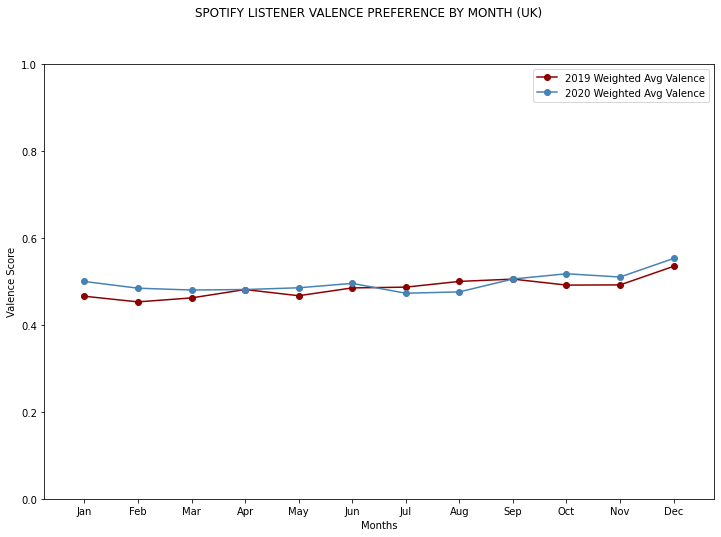

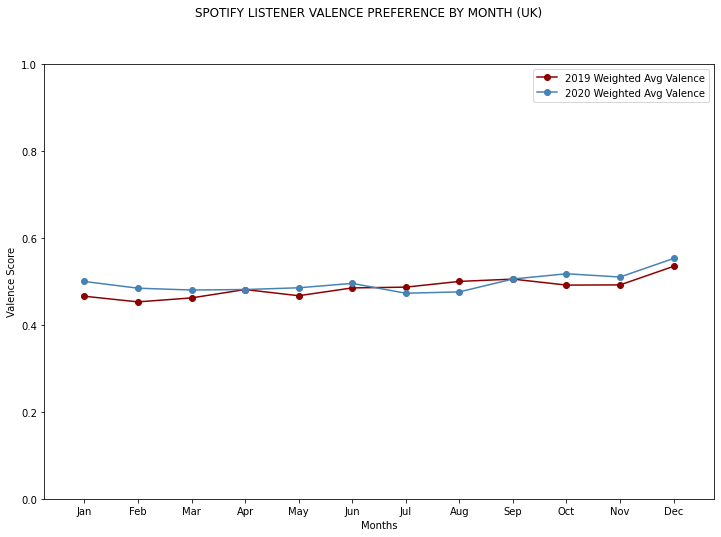

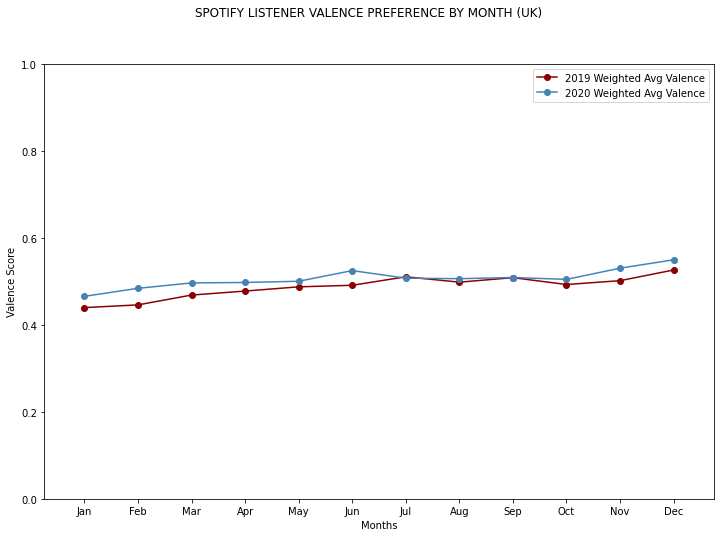

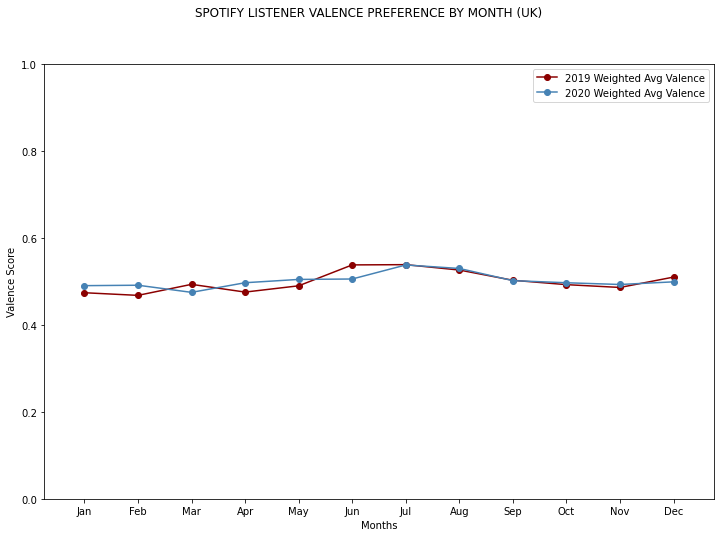

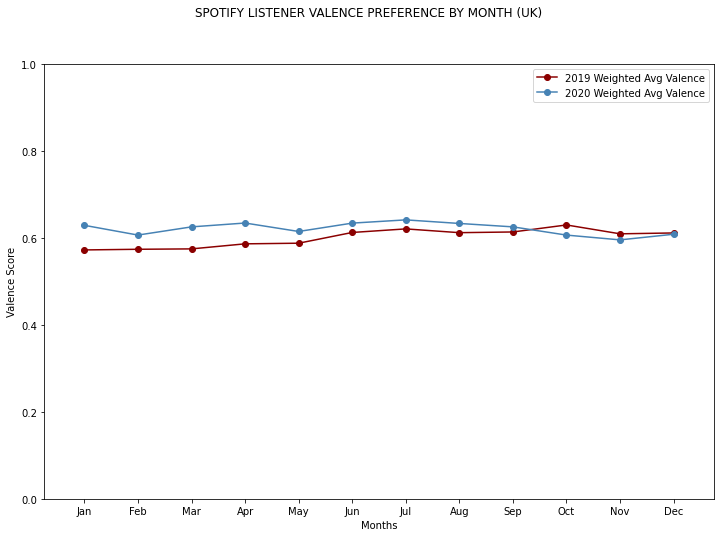

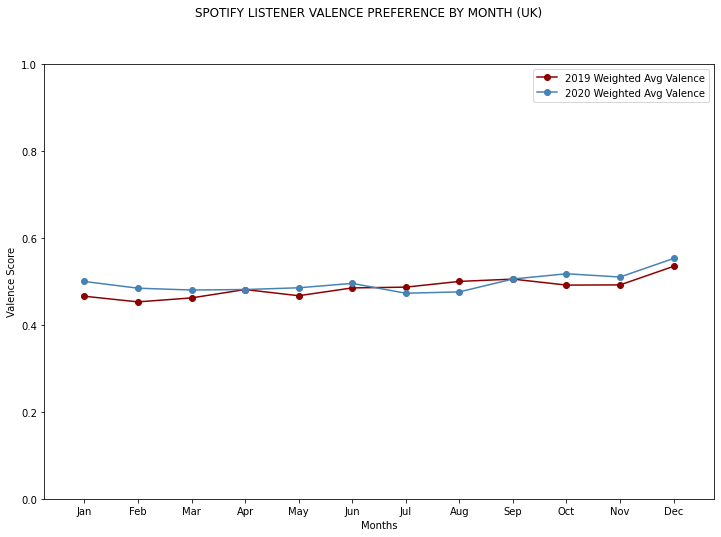

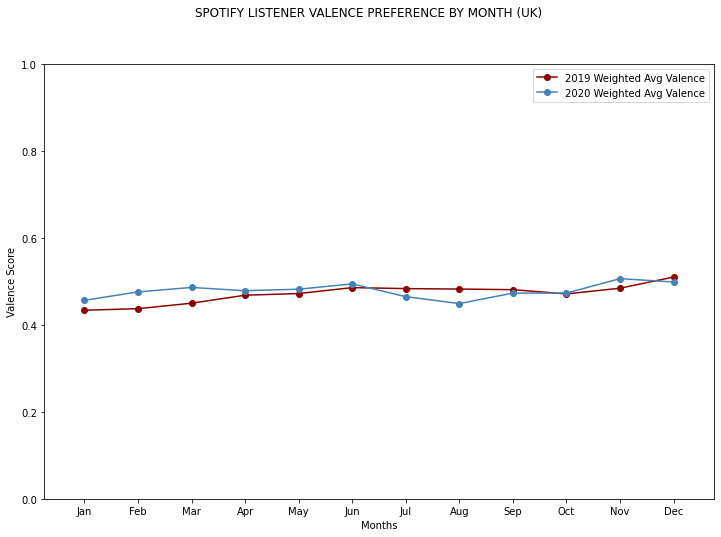

ValueError: x and y must have same first dimension, but have shapes (12,) and (11,)

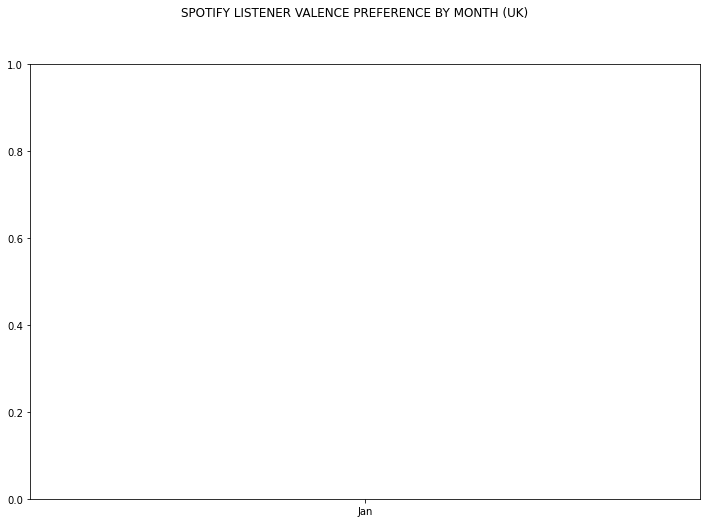

In [31]:
# Plot a comparison of 2019 2020 valence scores

# Set up lists to plot

variable_to_plot = 'Valence'
for country in countries_to_plot:
    
    country_df = countries_df[countries_df['Country'] == country]
    
    country_groupby = country_df.groupby(["Year", 'Month'], as_index=False)[variable_to_plot].mean()

    valence_2019 = country_groupby[country_groupby['Year'] == 2019]

    valence_2020 = country_groupby[country_groupby['Year'] == 2020]
    
    #valence_2020.drop('Year', inplace=True, axis=1)

    fig= plt.figure(figsize=(12,8))                                      # Set up figure size
    fig.suptitle('SPOTIFY LISTENER VALENCE PREFERENCE BY MONTH (UK)')         # Set up main title

    y_axis = valence_2019[variable_to_plot]
    x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',                  # Set up x axis
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    plt.plot(x_axis, valence_2019[variable_to_plot], label="2019 Weighted Avg Valence", marker='o', color='darkred')  # Plot 2019
    plt.plot(x_axis, valence_2020[variable_to_plot], label="2020 Weighted Avg Valence", marker='o', color='steelblue')  # Plot 2020

    plt.xlabel('Months')                                                 # Set up axis titles
    plt.ylabel('Valence Score')

    plt.xlim(-0.75, len(x_axis)-0.25)                                    # Set up axis limits
    plt.ylim(0, 1)

    plt.legend()                                                         # Include the legend

    plt.show()
    

